In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv("marketing_campaign.csv", sep='\t').dropna()
df = df.drop(["ID", "Dt_Customer"], axis = 1) # Removing data that may create discrepencies in handling
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,46,709,43,182,...,5,0,0,0,0,0,0,3,11,0
2236,1946,PhD,Together,64014.0,2,1,56,406,0,30,...,7,0,0,0,1,0,0,3,11,0
2237,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,6,0,1,0,0,0,0,3,11,0
2238,1956,Master,Together,69245.0,0,1,8,428,30,214,...,3,0,0,0,0,0,0,3,11,0


In [66]:
type = {}
for col in df.columns:
    type[col] = df[col].dtype
type

{'Year_Birth': dtype('int64'),
 'Education': dtype('O'),
 'Marital_Status': dtype('O'),
 'Income': dtype('float64'),
 'Kidhome': dtype('int64'),
 'Teenhome': dtype('int64'),
 'Recency': dtype('int64'),
 'MntWines': dtype('int64'),
 'MntFruits': dtype('int64'),
 'MntMeatProducts': dtype('int64'),
 'MntFishProducts': dtype('int64'),
 'MntSweetProducts': dtype('int64'),
 'MntGoldProds': dtype('int64'),
 'NumDealsPurchases': dtype('int64'),
 'NumWebPurchases': dtype('int64'),
 'NumCatalogPurchases': dtype('int64'),
 'NumStorePurchases': dtype('int64'),
 'NumWebVisitsMonth': dtype('int64'),
 'AcceptedCmp3': dtype('int64'),
 'AcceptedCmp4': dtype('int64'),
 'AcceptedCmp5': dtype('int64'),
 'AcceptedCmp1': dtype('int64'),
 'AcceptedCmp2': dtype('int64'),
 'Complain': dtype('int64'),
 'Z_CostContact': dtype('int64'),
 'Z_Revenue': dtype('int64'),
 'Response': dtype('int64')}

In [67]:
print(df["Education"].unique())
edu = {'Graduation':0,
        'PhD':1,
        'Master':2,
        'Basic':3,
        '2n Cycle': 4}
df["Education"].replace(edu, inplace= True)

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


In [68]:
marital = df["Marital_Status"].unique()
print(marital)
mar = {}
for i in range(len(marital)):
    mar[marital[i]] = i
df["Marital_Status"].replace(mar, inplace= True)

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [69]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler

In [70]:
scaler = StandardScaler()
feature = scaler.fit_transform(df)

In [71]:
df = df.apply(lambda x:(x - x.min())/(x.max() - x.min()))

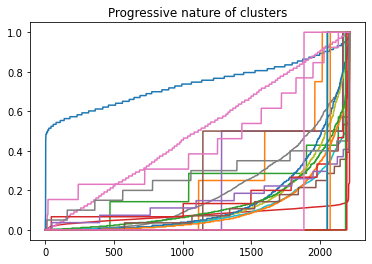

In [72]:
for col in df.columns:
    plt.plot(df[col].sort_values().reset_index().drop('index', axis = 1))
# plt.legend(df.columns)
plt.title("Progressive nature of clusters")
plt.show()

In [26]:
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)

In [73]:
kmeans.fit(feature)

KMeans(init='random', n_clusters=3, random_state=42)

In [75]:
# The lowest SSE value
kmeans.inertia_, kmeans.cluster_centers_, kmeans.n_iter_

(40502.385256133195,
 array([[-0.01533023, -0.09265106, -0.05212152,  1.01840827, -0.74783656,
         -0.66254105,  0.01731495,  0.92315025,  1.0662352 ,  1.3475045 ,
          1.15634746,  1.0631857 ,  0.65288559, -0.55747418,  0.35857002,
          1.17845212,  0.77879305, -1.05399568,  0.03452579,  0.20793261,
          0.79762833,  0.65991168,  0.18452809, -0.05993499,  0.        ,
          0.        ,  0.42671679],
        [-0.3707224 , -0.08406883,  0.13924562,  0.23734308, -0.44641884,
          0.73320404, -0.0272571 ,  0.4548413 , -0.04579865, -0.12066782,
         -0.08649765, -0.04444846,  0.32400659,  0.65902646,  0.82936499,
          0.15250988,  0.61155574,  0.12172255, -0.03939657,  0.21837055,
         -0.22748337, -0.14823389,  0.00303718, -0.0022426 ,  0.        ,
          0.        , -0.1139062 ],
        [ 0.24299422,  0.10261136, -0.06043493, -0.69289425,  0.68118312,
         -0.11146759,  0.00804101, -0.77991598, -0.53902313, -0.64144399,
         -0.5612501